If you're running this in Google Colab, you can click "Copy to Drive" (above &#8593;) or go to **File > Save a Copy in Drive** so you'll have your own version to work on. That requires a Google login. When submitting, please change "STUDENT" in the title to your last name.  
<hr/>

# Analyzing Measurement Uncertainty   
We'll use Dr. Natasha Holmes's *Statistics Summary* (linked in the course website) as a guide for how to analyze data in this course. This notebook shows how to do use python to do the calculations in section II *Statistics for Repeated Measurements with Statistical Variation* and section III *Making Comparisons*.

If you need to start over from scratch, open a [clean copy of this activity](https://colab.research.google.com/github/adamlamee/UCF_labs/blob/master/making_comparisons.ipynb). If you need a refresher on how to execute this notebook, try the [intro activity](https://colab.research.google.com/github/adamlamee/UCF_labs/blob/master/intro.ipynb).    

## II. Statistics for Repeated Measurements with Statistical Variation

In [7]:
# Arav Bhardwaj
# Comp Phys
# Mr. Payne
# 2023-03-13

In [1]:
import numpy as np                   # numpy does math
import matplotlib.pyplot as plt      # pyplot makes plots

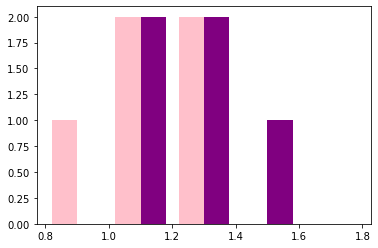

In [2]:
# you can change the measurements and histogram properties
# keep the same format (e.g., brackets and commas) to avoid errors

sample_a = [1.2, 1.3, 1.1, 0.9, 1.4]               # some measurements from sample A
sample_b = [1.3, 1.1, 1.4, 1.5, 1.2]               # some measurements from trial B to compare
plt.hist((sample_a, sample_b), bins=5, range=[0.8,1.8], color=('pink','purple'));   # makes a histogram

In [3]:
a_mean = np.mean(sample_a)   # calculates the mean of sample a, saves it as a variable names "a_mean"
a_mean                       # displays the mean value you just calculated

1.1800000000000002

In [5]:
# try adding code here to find the mean of sample b
# copy and paste are a programmers best friends, but rename your variables
b_mean = np.mean(sample_b)
b_mean

1.3000000000000003

In [13]:
a_stdev = np.std(sample_a, ddof=1)      # finds the standard deviation
a_stdev

0.1923538406167134

In [8]:
# try that again for sample b's standard deviation
b_stdev = np.std(sample_b, ddof=1)      # finds the standard deviation
b_stdev

0.15811388300841894

In [15]:
a_count = len(sample_a)      # "a_count" is now a variable with the number of observations in sample a
a_count

5

In [9]:
# now count the observations in sample b
b_count = len(sample_b)      
b_count

5

In [16]:
# finding standard uncertainty
a_stunc = a_stdev / np.sqrt(a_count)       # python can do algebra
a_stunc

0.08602325267042624

In [17]:
# how about sample b's standard uncertainty?
b_stunc = b_stdev / np.sqrt(b_count)
b_stunc

0.07071067811865474

## III. Comparing Means

In [18]:
# t' statistic
# for the code below to work, you'll need to have done the calculations for sample b above, too
t_prime = abs((a_mean - b_mean) / np.sqrt(a_stunc**2 + b_stunc**2))
t_prime

1.0776318121606507

Nicely done. If you found a t' of about 1.1, congrats! If not, check your math or start over with a [clean copy of this activity](https://colab.research.google.com/github/adamlamee/UCF_labs/blob/master/making_comparisons.ipynb).  


# IV. Plotting the Results  
Two options for plotting your data are given below.

A **scatterplot** is pretty standard when your independent variable has levels that are numeric, like distances or lengths. Want to customize this type of plot even more? See matplotlib's [scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) and [errorbar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html) pages.

A **barplot** is more appropriate when your independent variable has levels that aren't numeric, like "facing left" and "facing right". Want to customize this type of plot even more? See matplotlib's [barplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html) page.

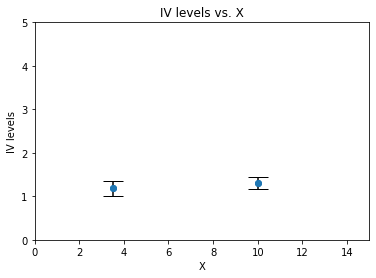

In [24]:
# here's a scatterplot for numeric IV levels

# set up the values that get plotted
x_values = [3.5,10]
y_values = [a_mean, b_mean]
errorbars = [2*a_stunc, 2*b_stunc]  # this is totally wrong; edit this to be twice the std unc for a and b

# this part makes the plot
fig, ax = plt.subplots()
ax.scatter(x_values, y_values)
ax.errorbar(x_values, y_values, yerr=errorbars, ecolor='black', capsize=10, fmt='o')

# edit these so your plot looks nice
ax.set_xlabel('X')
ax.set_ylabel('IV levels')
ax.set_title('IV levels vs. X')
ax.set_xlim(0,15)
ax.set_ylim(0,5)
ax.grid(False)
plt.show()

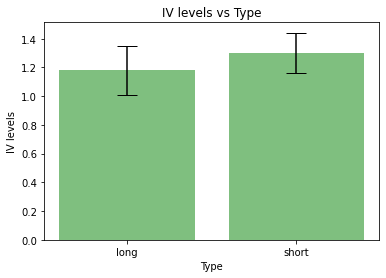

In [25]:
# here's a barplot for non-numeric ("categorical") IV levels

# set up the values that get plotted
bar_labels = ["long", "short"]     # you'll want to edit these labels
bar_heights = [a_mean, b_mean]     # these will be the heights of the bars, in order
errorbars = [2*a_stunc, 2*b_stunc]  # this is totally wrong; edit this to be twice the std unc for a and b

# this part makes the plot
fig, ax = plt.subplots()
ax.bar(bar_labels, bar_heights, yerr=errorbars, align='center', alpha=0.5, color='green', ecolor='black', capsize=10)

# edit these so your plot looks nice
ax.set_xlabel('Type')
ax.set_ylabel('IV levels')
ax.set_title('IV levels vs Type')
ax.grid(False)
plt.show()

## A new old approach to lab investigations: uncertainty analysis
Question: Is the magnetic field around your desk or computer uniform?
Investigate by making repeated measurements of the magnitude of the magnetic field at two locations near you. If you can get measurements from your left and right sides of your computer at distance (for both) of inch or 2cm increments away from the computer in a straight line (as in along a ruler). You'll need to create a variable name for each set of data and assign those data as appropriate. These will comprise the data sets to analyze.Most of the code needed is above and can be copied and pasted.<br><br> 
####For the analysis:<br>
###Easier
>*Report the field at each location by its mean +/- uncertainty. 
>>*Define uncertainty as half the range of the measurements at a ocation.<br>
>*Do the ranges for the two means overlap?<br>
###Intermediate (from Natasha Holmes’ labs)
Report the field at each location by its mean +/- standard uncertainty, $\bar{x}\pm\delta x$.
>*Define standard uncertainty in sample A as $\delta A=\frac{\sigma }{\sqrt{n}}$ , (the standard deviation of the trials) / (square root of the number of trials) <br>
>*Do the ranges for the two means overlap?<br>
###Advanced (from Natasha Holmes’ labs). Try it by hand or in a Python notebook
Report the field at each location by its mean +/- standard uncertainty, $\bar{x}\pm\delta x$.
>*Define standard uncertainty in sample A as $\delta A=\frac{\sigma }{\sqrt{n}}$ , (the standard deviation of the trials) / (square root of the number of trials) <br>
>^Calculate t’ using $t'=\frac{\left | \bar{A}-\bar{B} \right |}{\sqrt{\delta A^{2}+\delta B^{2}}}$ <br>
>*Interpret the t’ as<br>
>t’ < 1: unlikely the two means are the same<br>
>1 < t’ < 3: inconclusive<br>
>3 < t’: likely the two means are different


In [34]:
import pandas as pd
df = pd.read_excel("Magnetometer 2023-03-13 17-40-55.xls")
x, y = list(df["Time (s)"]), list(df["Absolute field (µT)"])

Text(0.5, 1.0, 'Absolute Field vs. Time')

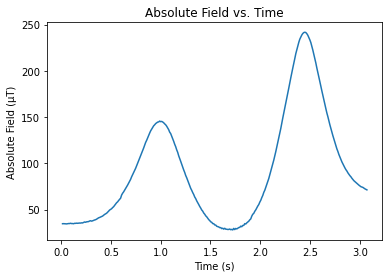

In [45]:
plt.plot(x, y)
plt.xlabel("Time (s)")
plt.ylabel("Absolute Field (µT)")
plt.title("Absolute Field vs. Time")

In [63]:
halfway = len(y)//2
first_half = y[:halfway]
second_half = y[halfway:]

In [64]:
# calculate means 
first_mean = np.mean(first_half)
second_mean = np.mean(second_half)
print(first_mean)
print(second_mean)

74.8136290620869
109.84506505529113


In [65]:
# calculate stdevs
first_stdev = np.std(first_half, ddof=1)
second_stdev = np.std(second_half, ddof=1)
print(first_stdev)
print(second_stdev)

38.52273672913325
69.76695785475282


In [66]:
# calculate standard uncertainty
first_stunc = first_stdev / np.sqrt(len(first_half))
second_stunc = second_stdev / np.sqrt(len(second_half))
print(first_stunc)
print(second_stunc)

3.1246065490231096
5.640324243395325


In [70]:
# calculate ranges
first_range_low, first_range_high = first_mean - first_stunc, first_mean + first_stunc
second_range_low, second_range_high = second_mean - second_stunc, second_mean + second_stunc
print(f"{first_range_low}, {first_range_high}")
print(f"{second_range_low}, {second_range_high}")

71.68902251306379, 77.93823561111002
104.2047408118958, 115.48538929868646


In [67]:
# calculate t'
t_prime = abs((first_mean - second_mean) / np.sqrt(first_stunc**2 + second_stunc**2))
t_prime

5.432933327960226

### Since the value of t' > 3, we can conclude that the there is a significant difference in the magnetic field the computer on my desk. 

<hr/>  

# Credits
This notebook was written by [Adam LaMee](http://www.adamlamee.com) with contributions by UCF graduate student Ifthakar Bin Elius. Thanks to the great folks at [Binder](https://mybinder.org/) and [Google Colaboratory](https://colab.research.google.com/notebooks/intro.ipynb) for making this notebook interactive without you needing to download it or install [Jupyter](https://jupyter.org/) on your own device.